<a href="https://colab.research.google.com/github/Booch22/Linear_regression/blob/main/ANN_k_folds%2BconMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install python_speech_features

In [1]:
!pip install python_speech_features

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5870 sha256=2449f4a8029530cea36e6663c26d7db7381d581113a1c4b7656557dffcb0448f
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


Import library

In [2]:
import numpy as np #นำมาใช้โหลดไฟล์ npz เพื่อเอาข้อมูลไปเทรนด์ในโมเดล
from tensorflow import keras #ใช้สำหรับ machine learning
from tensorflow.keras import layers #นำเข้า layers เพื่อใช้ convolution
import matplotlib.pyplot as plt
from python_speech_features import mfcc #นำมาใช้กับ MFCC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from google.colab import files

Fuction

In [3]:
# Convert .npz file to array
def npz_to_array( npz ) : #รับค่าพารามิเตอร์จาก npz ซึ่งส่งมาจากตัวแปรหนึ่งที่เก็บข้อมูลชนิดนี้ไว้
    for i in npz : #ใช้ for loop ในการวนค่าทั้งหมดที่อยู่ในไฟล์ npz
      array = npz[i] #เก็บข้อมูลจาก npz ทุกตัวไว้ในตัวแปรชื่อ array
    return array #คืนค่า array เพื่อนำข้อมูลไปใช้งานต่อ

def shuffle_data( feature, label ) :
    x_data = np.zeros( feature.shape ) # สร้างข้อมูลสำหรับแทนที่
    y_data = np.zeros( label.shape ) # สร้างข้อมูลสำหรับแทนที่
    num_arr = np.arange( len(feature) ) # สร้างลำดับเลขตามขนาดของข้อมูล ก่อนนำมา shuffle
    np.random.shuffle( num_arr ) # shuffle ลำดับตัวเลข เพื่อนำไปใช้แทนข้อมูลชุดใหม่
    print( f"shuffle sequence is {num_arr}" )
    for i in range(0, len(num_arr)) :
        x_data[i] = x_train[ (num_arr[i]) ]
        y_data[i] = y_train[ (num_arr[i]) ]
    print( f"show shuffle data\n{x_data}", f"\n{y_data}\n")
    return x_data, y_data

def gen_folds( index ) : # ข้อมูลใน index คือแกนที่จะใช้แบ่งข้อมูลแต่ละ folds ให้แตกต่างกันออกไป
    feature = np.zeros( [len(index), shuffle_x.shape[1]] ) # สร้างข้อมูลสำหรับแทนที่
    label = np.zeros( [len(index)] ) # สร้างข้อมูลสำหรับแทนที่
    for i in range( 0, len(index) ) :
            feature[i] = shuffle_x[ index[i] ]
            label[i] = shuffle_y[ index[i] ]
    return feature, label

def process_data( x_data, y_data ) :
    mfcc_data = array_to_mfcc( x_data ) # use mfcc function
    normaliz_data = min_max_normaliz( mfcc_data) # normalization data
    X_data = np.expand_dims( normaliz_data, -1 ) # reshape
    Y_data = keras.utils.to_categorical( y_data, num_classes ) # แปลง labels เป็น one-hot encoding
    #show_fold( feature_train0, label_train0, feature_val0, label_val0 )
    return X_data, Y_data

# features extraction by mfcc
def array_to_mfcc( features ) :
    rate = 44100
    samples = features.shape[0] #เช็คจำนวนของข้อมูล
    answer = np.zeros( (samples, 299, 13) ) #สร้างเพื่อนำมาใส่ข้อมูลหลังเข้า mfcc function
    for i in range( 0, samples ) :
        answer[ i : i+1 ] = mfcc( features[i], rate ) #นำไปเข้าฟังก์ชั่น MFCC
    return answer

# MinMax normalization function
def min_max_normaliz( input_data ) :
    output_data = np.zeros( input_data.shape ) #create new_data
    for i in range( 0, input_data.shape[0] ) : #loop ตามจำนวน sample
      output_data[i] = ( input_data[i:i+1] - np.min(input_data[i:i+1]) ) / ( np.max(input_data[i:i+1]) - np.min(input_data[i:i+1]) )
    return output_data

# Train the model and plot graph
def train_model( model, X_train, Y_train, X_val, Y_val ) :
    logs = model.fit( X_train, Y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_val, Y_val) ).history # train
    train_accuracy = logs["accuracy"][epochs - 1] # เลิอกค่าสุดท้ายของ train_accuracy
    val_accuracy = logs["val_accuracy"][epochs - 1] # เลิอกค่าสุดท้ายของ val_accuracy
    train_loss = logs["loss"][epochs - 1] # เลิอกค่าสุดท้ายของ train_loss
    val_loss = logs["val_loss"][epochs - 1] # เลิอกค่าสุดท้ายของ val_loss

    # Show trained and validation loss
    plt.figure( figsize = (10, 6) ) #(10, 6)
    with plt.style.context( 'seaborn' ) :
        plt.title( 'Loss training process' )
        plt.xlabel( 'Epochs' )
        plt.ylabel( 'Loss' )
        plt.plot( logs['loss'], c = 'forestgreen', linewidth = 2.5, label = 'Training' )
        plt.plot( logs['val_loss'], c = 'darkorange', linestyle = '--', label = 'Validation' )
        plt.legend( frameon = True, facecolor = 'white' )
        plt.show()
    # Show trained and validation accuracy
    plt.figure( figsize = (10, 6) ) #(10, 6)
    with plt.style.context( 'seaborn' ) :
        plt.title( 'Accuracy training process' )
        plt.xlabel( 'Epochs' )
        plt.ylabel( 'Accuracy' )
        plt.plot( logs['accuracy'], c = 'forestgreen', linewidth = 2.5, label = 'Training' )
        plt.plot( logs['val_accuracy'], c = 'darkorange', linestyle = '--', label = 'Validation' )
        plt.legend( frameon = True, facecolor = 'white' )
        plt.show()
    return model, train_accuracy, val_accuracy, train_loss, val_loss

# Return the model predicted answer
def TurnPredicted( predicted ) :
    model_predicted = 0
    if predicted[1] < predicted[0] > predicted[2] :
        model_predicted = 0
    elif predicted[0] < predicted[1] > predicted[2] :
        model_predicted = 1
    elif predicted[0] < predicted[2] > predicted[1] :
        model_predicted = 2
    return model_predicted

Upload data

In [4]:
uploaded1 = files.upload() #features_train1.npz
uploaded2 = files.upload() #features_test1.npz
uploaded3 = files.upload() #labels_train1.npz
uploaded4 = files.upload() #labels_test1.npz

Saving features_test9.npz to features_test9.npz


Saving features_train9.npz to features_train9.npz


Saving labels_test9.npz to labels_test9.npz


Saving labels_train9.npz to labels_train9.npz


Convert data to array

In [5]:
# Model / data parameters
input_shape = ( 299, 13, 1 ) # ปรับตามขนาดของข้อมูล
num_classes = 3

# import data
input_train = np.load( 'features_train9.npz' ) #ใช้คำสั่ง np.load นำเข้าข้อมูลจากไฟล์ npy หรือ npz ก็ได้
output_train = np.load( 'labels_train9.npz' ) #ถ้าไฟล์เป็น npy ค่าที่ถูก returned จะเป็น single array
input_test = np.load( 'features_test9.npz' ) #ถ้าไฟล์เป็น npz ค่าที่ถูก returned จะเป็นแบบ dictionary คือเป็น array ที่มีชื่อด้วย {filename : array}
output_test = np.load( 'labels_test9.npz' ) #นั่นหมายความว่าในไฟล์ npz ข้อมูลชื่อแต่ละอันจะมีค่าเป็น array จริงๆแล้วไม่ต้องตั้งชื่อก็ได้

# Convert .npz to array for deep learning
x_train = npz_to_array( input_train ) #นำข้อมูลที่เก็บไฟล์ npz ไปเข้าฟังก์ชันแปลงไฟล์ npz เป็น array
y_train = npz_to_array( output_train ) #เมื่อนำข้อมูลทั้งหมดใน npz แปลงเป็น array ส่งค่ากลับไปเก็บในตัวแปร เพื่อนำไปใช้งาน
x_test = npz_to_array( input_test )
y_test = npz_to_array( output_test )

Prepare data for model

In [6]:
# Shuffle train set
shuffle_x, shuffle_y = shuffle_data( x_train, y_train ) # train set ไปสลับข้อมูล

# K-folds cross validation
n_folds = 5
kf = KFold( n_splits = n_folds ) # ตั้งค่าจำนวน folds ที่จะแบ่งข้อมูล, และ shuffle คือการสับข้อมูลก่อนจะแบ่ง
print(kf)
for i, ( train_index, val_index ) in enumerate( kf.split(X = shuffle_x) ) : # ทำการวนซ้ำแบบแจกแจง แบ่งข้อมูลเป็น fold จาก kf และแจกแจงให้ train_index, test_index
    print(f"\nFold {i}:")
    globals()[ f"feature_train{i}" ], globals()[ f"label_train{i}" ] =  gen_folds( train_index ) # train fold
    globals()[ f"feature_val{i}" ], globals()[ f"label_val{i}" ] =  gen_folds( val_index ) # validation fold

# Prepare data before train the model
X_train0, Y_train0 = process_data( feature_train0, label_train0 )
X_train1, Y_train1 = process_data( feature_train1, label_train1 )
X_train2, Y_train2 = process_data( feature_train2, label_train2 )
X_train3, Y_train3 = process_data( feature_train3, label_train3 )
X_train4, Y_train4 = process_data( feature_train4, label_train4 )

X_val0, Y_val0 = process_data( feature_val0, label_val0 )
X_val1, Y_val1 = process_data( feature_val1, label_val1 )
X_val2, Y_val2 = process_data( feature_val2, label_val2 )
X_val3, Y_val3 = process_data( feature_val3, label_val3 )
X_val4, Y_val4 = process_data( feature_val4, label_val4 )

X_test, Y_test = process_data( x_test, y_test )
print( X_test.shape[0], "test samples" ) #บอกจำนวนตัวอย่างทั้งหมดที่จะใช้ทดสอบว่ามีกี่ชุด

shuffle sequence is [29 28 20 14  6 26 24 13 23 12  4  3 21 25 18 16  0  7  5 27  9 17 11  1
 15 19  2 22  8 10]
show shuffle data
[[   0.    0.   -1. ...   -3.   -4.   -6.]
 [   0.    0.   -1. ...   12.    9.    8.]
 [   0.    0.   -1. ...  -21.  -17.  -18.]
 ...
 [   0.    0.   -1. ...  -41.  -63.  -91.]
 [   0.    0.   -1. ... -401. -469. -422.]
 [   0.    0.   -1. ...  239.  211.  229.]] 
[2. 2. 2. 1. 0. 2. 2. 1. 2. 1. 0. 0. 2. 2. 1. 1. 0. 0. 0. 2. 0. 1. 1. 0.
 1. 1. 0. 2. 0. 1.]

KFold(n_splits=5, random_state=None, shuffle=False)

Fold 0:

Fold 1:

Fold 2:

Fold 3:

Fold 4:


30 test samples


Build and train the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3887)              0         
                                                                 
 dense (Dense)               (None, 64)                248832    
                                                                 
 dense_1 (Dense)             (None, 512)               33280     
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 256)               6

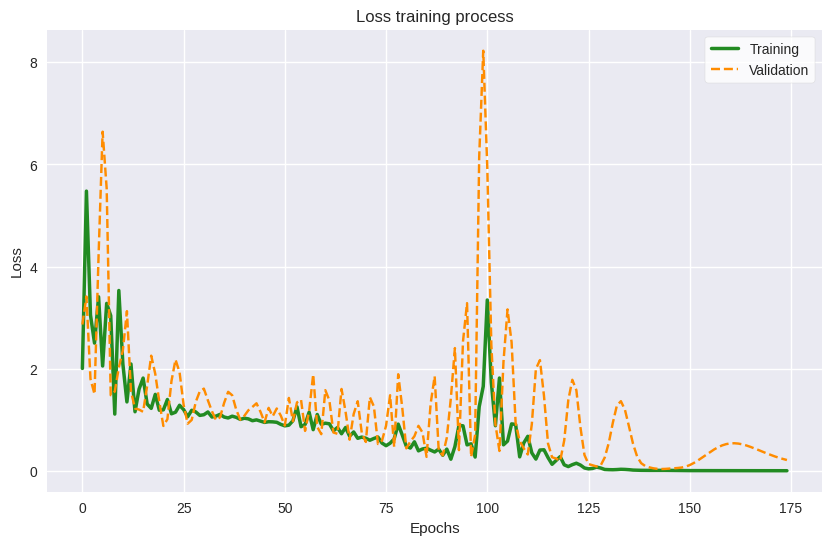

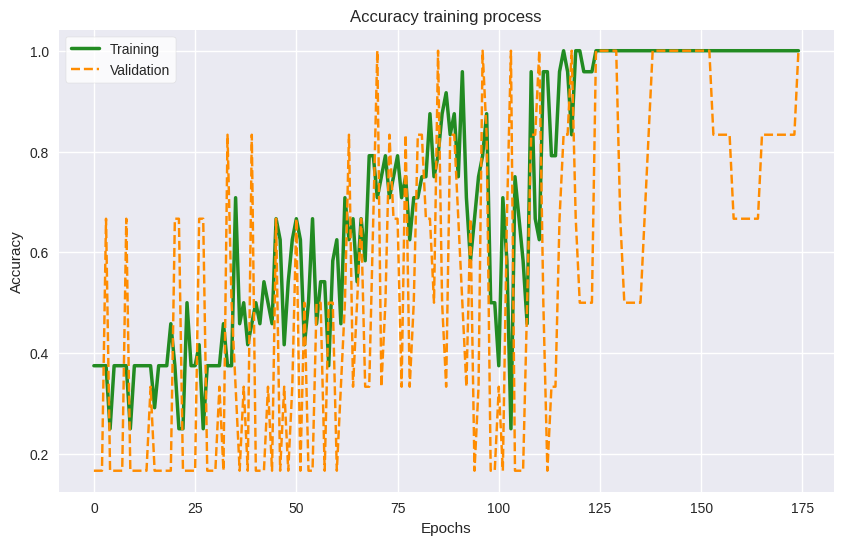

Epoch 1/175
1/1 [==============================] - 3s 3s/step - loss: 1.4270 - accuracy: 0.3333 - val_loss: 4.2940 - val_accuracy: 0.3333
Epoch 2/175
1/1 [==============================] - 0s 48ms/step - loss: 4.3216 - accuracy: 0.3333 - val_loss: 5.8560 - val_accuracy: 0.3333
Epoch 3/175
1/1 [==============================] - 0s 66ms/step - loss: 5.8405 - accuracy: 0.3333 - val_loss: 6.5718 - val_accuracy: 0.3333
Epoch 4/175
1/1 [==============================] - 0s 44ms/step - loss: 6.5535 - accuracy: 0.3333 - val_loss: 4.2377 - val_accuracy: 0.3333
Epoch 5/175
1/1 [==============================] - 0s 63ms/step - loss: 4.2122 - accuracy: 0.3333 - val_loss: 4.0985 - val_accuracy: 0.3333
Epoch 6/175
1/1 [==============================] - 0s 48ms/step - loss: 4.0772 - accuracy: 0.3333 - val_loss: 2.2024 - val_accuracy: 0.3333
Epoch 7/175
1/1 [==============================] - 0s 46ms/step - loss: 2.1971 - accuracy: 0.3333 - val_loss: 2.6222 - val_accuracy: 0.3333
Epoch 8/175
1/1 [=====

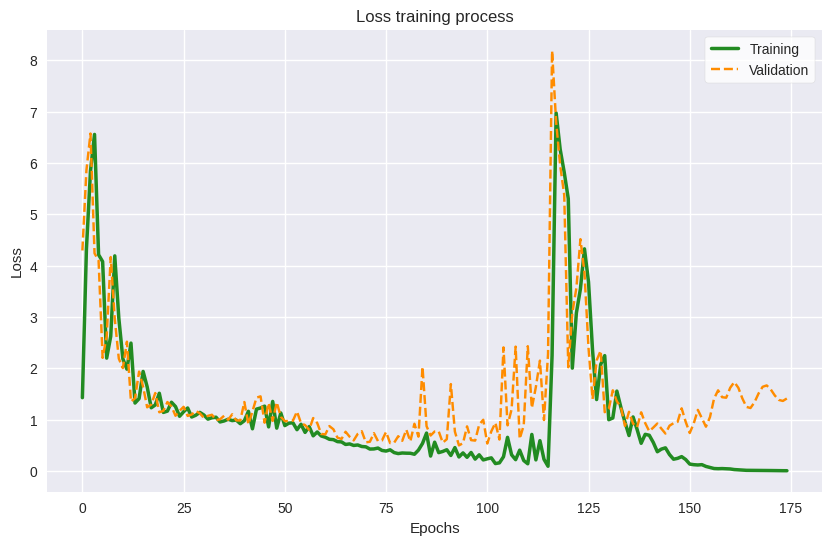

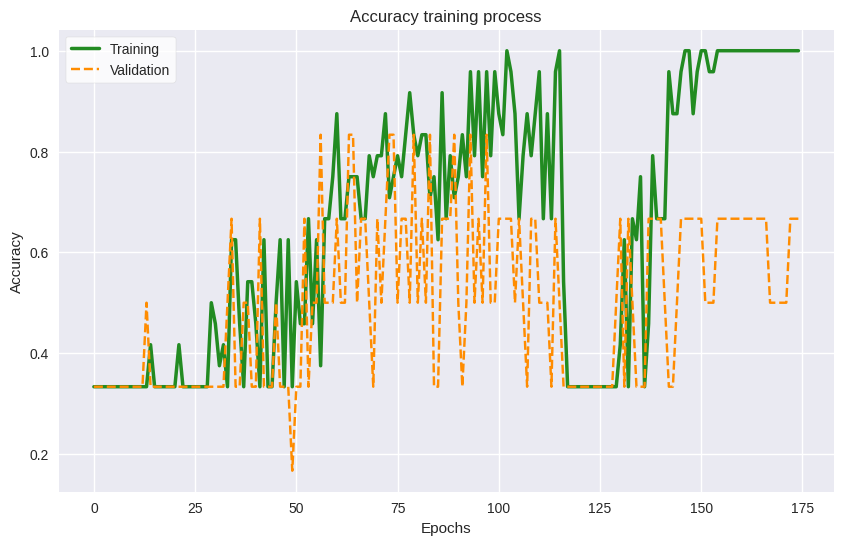

Epoch 1/175
1/1 [==============================] - 3s 3s/step - loss: 1.7607 - accuracy: 0.3333 - val_loss: 5.0094 - val_accuracy: 0.3333
Epoch 2/175
1/1 [==============================] - 0s 51ms/step - loss: 5.0315 - accuracy: 0.3333 - val_loss: 5.3650 - val_accuracy: 0.3333
Epoch 3/175
1/1 [==============================] - 0s 51ms/step - loss: 5.2333 - accuracy: 0.3333 - val_loss: 6.7743 - val_accuracy: 0.3333
Epoch 4/175
1/1 [==============================] - 0s 53ms/step - loss: 6.5832 - accuracy: 0.3333 - val_loss: 4.1296 - val_accuracy: 0.3333
Epoch 5/175
1/1 [==============================] - 0s 48ms/step - loss: 4.0904 - accuracy: 0.3333 - val_loss: 3.7447 - val_accuracy: 0.3333
Epoch 6/175
1/1 [==============================] - 0s 51ms/step - loss: 3.7082 - accuracy: 0.3333 - val_loss: 2.2802 - val_accuracy: 0.3333
Epoch 7/175
1/1 [==============================] - 0s 70ms/step - loss: 2.2690 - accuracy: 0.3333 - val_loss: 3.1940 - val_accuracy: 0.3333
Epoch 8/175
1/1 [=====

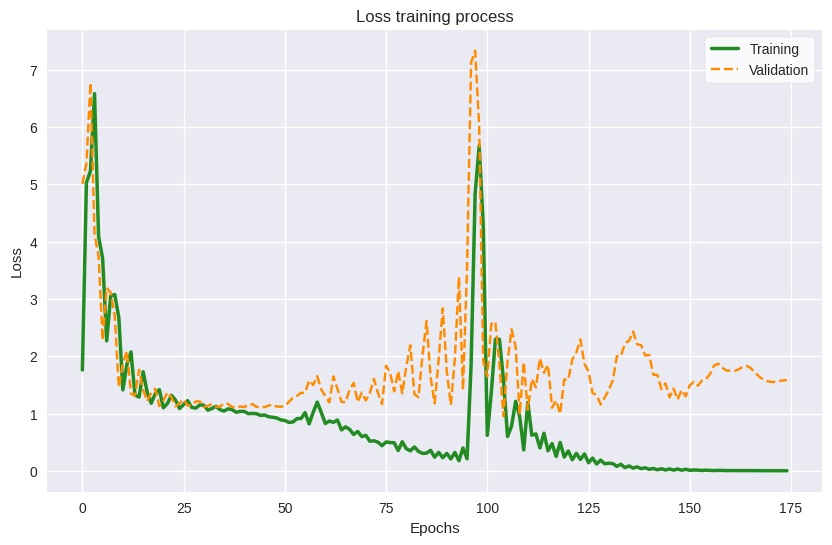

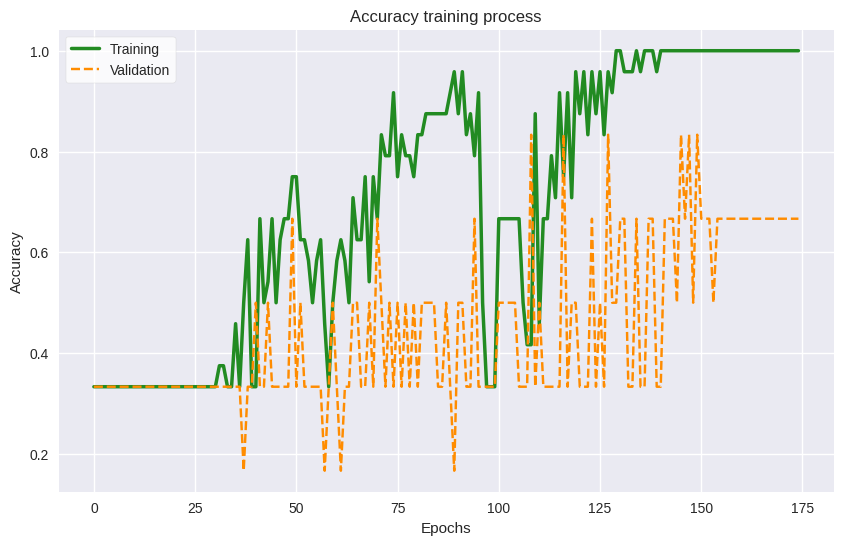

Epoch 1/175
1/1 [==============================] - 4s 4s/step - loss: 1.5329 - accuracy: 0.2917 - val_loss: 5.2620 - val_accuracy: 0.1667
Epoch 2/175
1/1 [==============================] - 0s 75ms/step - loss: 3.3837 - accuracy: 0.4167 - val_loss: 5.4125 - val_accuracy: 0.5000
Epoch 3/175
1/1 [==============================] - 0s 65ms/step - loss: 7.9972 - accuracy: 0.2917 - val_loss: 1.1713 - val_accuracy: 0.3333
Epoch 4/175
1/1 [==============================] - 0s 52ms/step - loss: 1.6045 - accuracy: 0.3333 - val_loss: 8.1068 - val_accuracy: 0.1667
Epoch 5/175
1/1 [==============================] - 0s 67ms/step - loss: 5.9378 - accuracy: 0.3750 - val_loss: 3.7363 - val_accuracy: 0.1667
Epoch 6/175
1/1 [==============================] - 0s 70ms/step - loss: 2.5389 - accuracy: 0.3750 - val_loss: 2.9197 - val_accuracy: 0.3333
Epoch 7/175
1/1 [==============================] - 0s 69ms/step - loss: 3.5921 - accuracy: 0.3333 - val_loss: 2.9629 - val_accuracy: 0.5000
Epoch 8/175
1/1 [=====

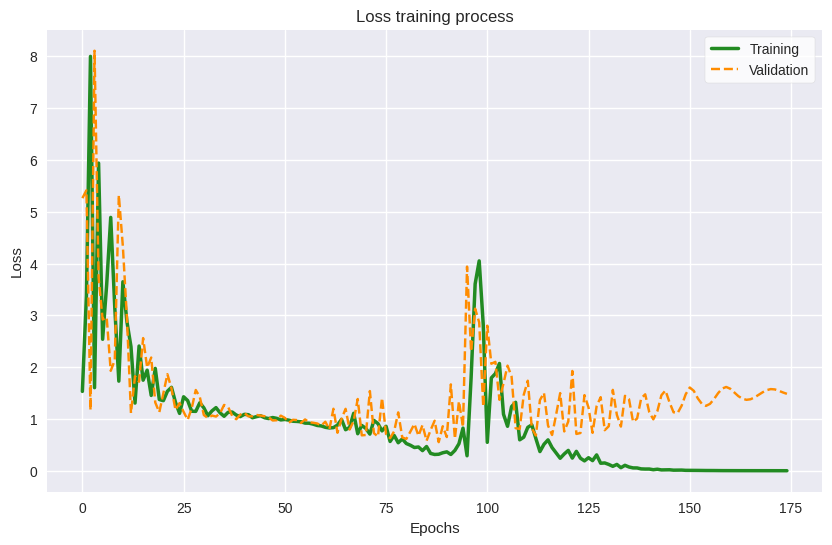

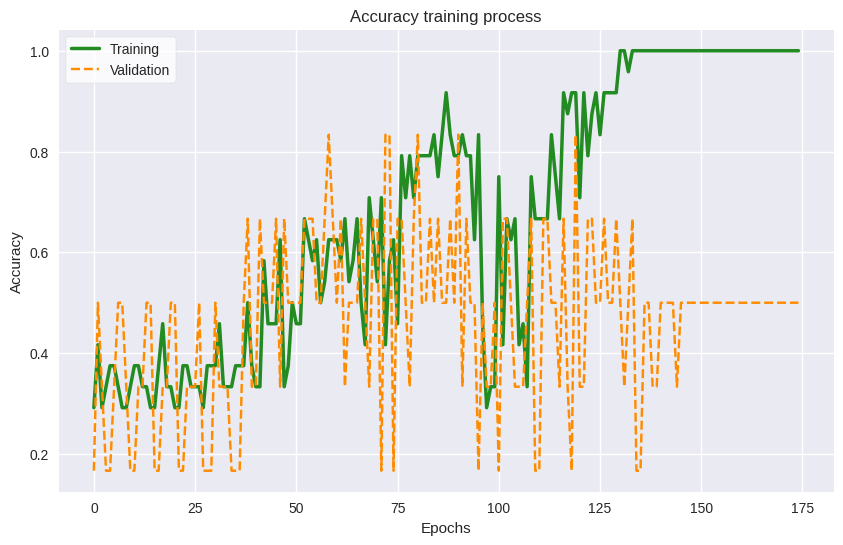

Epoch 1/175
1/1 [==============================] - 3s 3s/step - loss: 1.1533 - accuracy: 0.5833 - val_loss: 3.5953 - val_accuracy: 0.5000
Epoch 2/175
1/1 [==============================] - 0s 58ms/step - loss: 4.7561 - accuracy: 0.2917 - val_loss: 9.2891 - val_accuracy: 0.1667
Epoch 3/175
1/1 [==============================] - 0s 68ms/step - loss: 5.7241 - accuracy: 0.3750 - val_loss: 12.7051 - val_accuracy: 0.3333
Epoch 4/175
1/1 [==============================] - 0s 55ms/step - loss: 11.0550 - accuracy: 0.3333 - val_loss: 5.0708 - val_accuracy: 0.3333
Epoch 5/175
1/1 [==============================] - 0s 69ms/step - loss: 4.0223 - accuracy: 0.3333 - val_loss: 5.4047 - val_accuracy: 0.1667
Epoch 6/175
1/1 [==============================] - 0s 77ms/step - loss: 4.4219 - accuracy: 0.3750 - val_loss: 5.1405 - val_accuracy: 0.5000
Epoch 7/175
1/1 [==============================] - 0s 71ms/step - loss: 6.0865 - accuracy: 0.2917 - val_loss: 3.7730 - val_accuracy: 0.5000
Epoch 8/175
1/1 [===

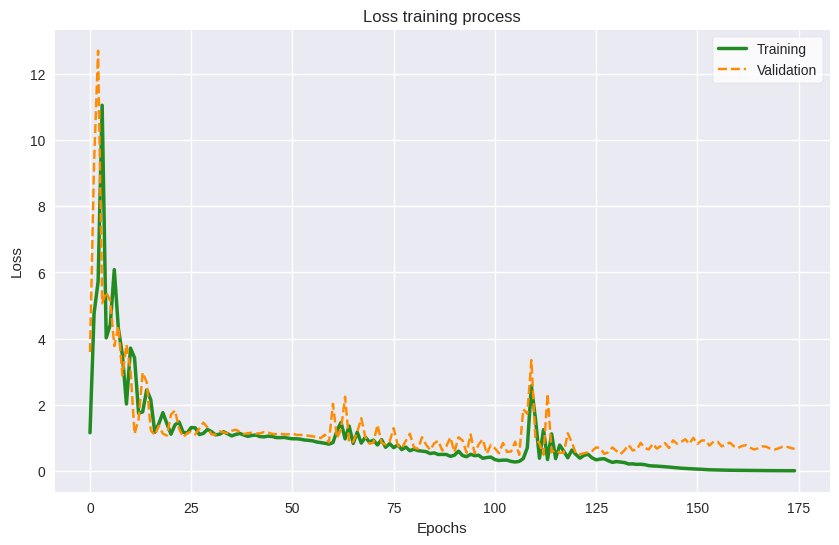

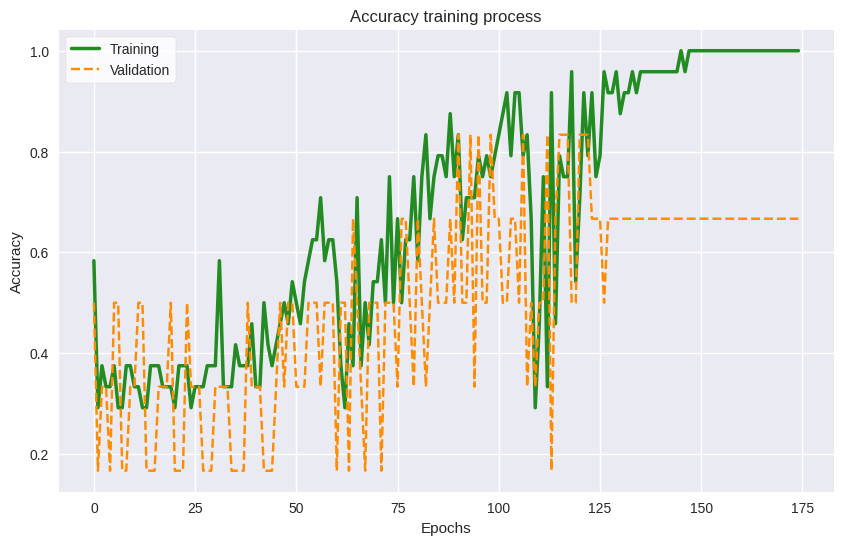

accuracy score --> [2.         1.66666669 1.66666669 1.5        1.66666669]
loss_score ------> [0.21203815 1.41677728 1.5842197  1.48761613 0.67039875]
higher accuracy score -> 2.0
lower loss score 0.2120381532004103
[ 0.21203815 99.         99.         99.         99.        ]

Choose -> model0
Test loss: 0.32044506072998047
Test accuracy: 0.8666666746139526
1/1 [==============================] - 0s 133ms/step


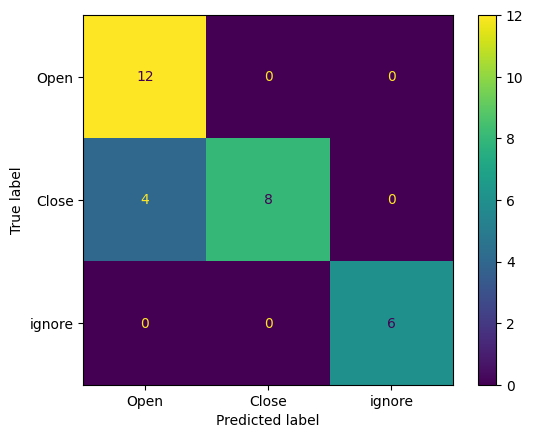

In [7]:
# Build the model
units = 4
for i in range( n_folds ) :
  globals()[ f"model{i}" ] = keras.Sequential(
          [
            keras.Input( shape = input_shape ), #keras.Input คือการกำหนดค่าของข้อมูลที่จะนำไปใช้กับโมเดล, shape คือการกำหนดค่าของอินพุตข้อมูลที่จะนำไปใช้กับ model
            layers.Flatten(), #เป็นการปรับข้อมูลในอินพุตให้เรียบ (ทำให้เหลือมิติเดียว)
            layers.Dense( units = 64, activation = "selu" ),
            layers.Dense( units = 512, activation = "selu" ),
            layers.Dense( units = 256, activation = "selu" ),
            layers.Dense( units = 256, activation = "selu" ),
            layers.Dense( units = 256, activation = "selu" ),
            layers.Dense( units = 256, activation = "selu" ),
            layers.Dense( units = num_classes, activation = "softmax" )
          ]
  )
model0.summary() #สรุปโครงสร้างและพารามิเตอร์ของโมเดล แสดงเป็นตาราง

# Compile the model
model0.compile( loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"] )
model1.compile( loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"] )
model2.compile( loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"] )
model3.compile( loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"] )
model4.compile( loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"] )

# Train the model
batch_size = 24
epochs = 175
process = { "acc" : np.zeros(n_folds), "val_acc" : np.zeros(n_folds),
            "loss" : np.zeros(n_folds), "val_loss" : np.zeros(n_folds) } # สร้าง dictionary ใช้เก็บค่าที่เทรนด์
Model0, process["acc"][0], process["val_acc"][0], process["loss"][0], process["val_loss"][0] = train_model( model0, X_train0, Y_train0, X_val0, Y_val0 )
Model1, process["acc"][1], process["val_acc"][1], process["loss"][1], process["val_loss"][1] = train_model( model1, X_train1, Y_train1, X_val1, Y_val1 )
Model2, process["acc"][2], process["val_acc"][2], process["loss"][2], process["val_loss"][2] = train_model( model2, X_train2, Y_train2, X_val2, Y_val2 )
Model3, process["acc"][3], process["val_acc"][3], process["loss"][3], process["val_loss"][3] = train_model( model3, X_train3, Y_train3, X_val3, Y_val3 )
Model4, process["acc"][4], process["val_acc"][4], process["loss"][4], process["val_loss"][4] = train_model( model4, X_train4, Y_train4, X_val4, Y_val4 )

# Get the score from training model
acc_score = np.zeros( n_folds ) # สร้างตัวเก็บข้อมูล
loss_score = np.zeros( n_folds ) # สร้างตัวเก็บข้อมูล
for i in range( n_folds ) :
    acc_score[i] = process[ "acc" ][i] + process[ "val_acc" ][i] # นำค่าความแม่นยำมารวมกัน
    loss_score[i] = process[ "loss" ][i] + process[ "val_loss" ][i] # นำค่าความสูญเสียมารวมกัน
    if( i == (n_folds - 1) ) : # หลังจากเก็บข้อมูลครบ ให้แสดงค่า
        print( f"accuracy score --> {acc_score}" )
        print( f"loss_score ------> {loss_score}" )
        print( f"higher accuracy score -> {np.max(acc_score)}" )
        print( f"lower loss score {np.min(loss_score)}"  )

# Choose the best model
index = np.zeros( n_folds ) + 99 # สร้างตัวแปรเก็บค่า loss เพื่อนำไปประมวลผลต่อ (ใช้เปรียบเทียบเมื่อค่าความแม่นยำเท่ากัน)
for fold in range( n_folds ) :
    if( acc_score[fold] == np.max(acc_score) ) : # นำค่า loss จากโมเดลที่มี accuracy สูงไปคิดต่อ (ใช้เปรียบเทียบเมื่อค่าความแม่นยำเท่ากัน)
        if( fold == 0 ) :
            index[0] = loss_score[0]
        elif( fold == 1 ) :
            index[1] = loss_score[1]
        elif( fold == 2 ) :
            index[2] = loss_score[2]
        elif( fold == 3 ) :
            index[3] = loss_score[3]
        elif( fold == 4 ) :
            index[4] = loss_score[4]
print(index)
for i in range( n_folds ) : #หาโมเดลที่ loss น้อยที่สุด
    if( index[i] == np.min(index) ) :
        if( i == 0 ) :
            print( "\nChoose -> model0" )
            Best_model = Model0
            break
        elif( i == 1 ) :
            print( "\nChoose -> model1" )
            Best_model = Model1
            break
        elif( i == 2 ) :
            print( "\nChoose -> model2" )
            Best_model = Model2
            break
        elif( i == 3 ) :
            print( "\nChoose -> model3" )
            Best_model = Model3
            break
        elif( i == 4 ) :
            print( "\nChoose -> model4" )
            Best_model = Model4
            break

# Evaluate the trained model
score = Best_model.evaluate( X_test, Y_test, verbose = 0 ) #model.evaluate คือการคืนค่า loss และค่า metrics สำหรับโมเดลจากการทดสอบ
y_predicted = np.zeros( y_test.shape )
print( "Test loss:", score[0] ) #แสดงค่า loss
print( "Test accuracy:", score[1] ) #แสดงค่า accuracy

predicted_classes = Best_model.predict( X_test ) #คาดการณ์จาก input ที่ใส่ไป
for i, predict in enumerate( predicted_classes[ : X_test.shape[0] ] ) : #ให้วนตามจำนวน sample test(X_test.shape[0])
    y_predicted[i] = TurnPredicted( predict )
    #print( "Predicted {} Class {}".format(predict, y_test[i]) )

# Show confusion matrix
ConfusionMatrixDisplay.from_predictions( y_test, y_predicted, display_labels = [ "Open", "Close", "ignore" ]  )
plt.show()